# Figure S5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd
import scipy.stats as sp
import importlib

import replay_structure.metadata as meta
import replay_structure.read_write as read_write
import replay_structure.descriptive_stats as task_analysis

In [2]:
SMALL_SIZE = 5
MEDIUM_SIZE = 6
BIGGER_SIZE = 7

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
summary_df = read_write.load_descriptive_stats(meta.Ripple_Data.default_time_window_ms, meta.Ripple_Data.name, meta.Ripple_Data.default_likelihood_function, ext='')
summary_df = summary_df[~np.isnan(summary_df['avg_fr'])] # ripples that have popburst
temporal_df = summary_df[summary_df['trajectory_model']==True]

## Supplementary Figure - AWAY = GOAL

t(-2.9156), corrected p-value 0.010897134178269928
t(-4.8575), corrected p-value 4.164174719225359e-06
t(-5.7995), corrected p-value 2.7079659721539665e-08
t(-4.5698), corrected p-value 1.6556502491062142e-05
AWAY = GOAL
degrees of freedom=960


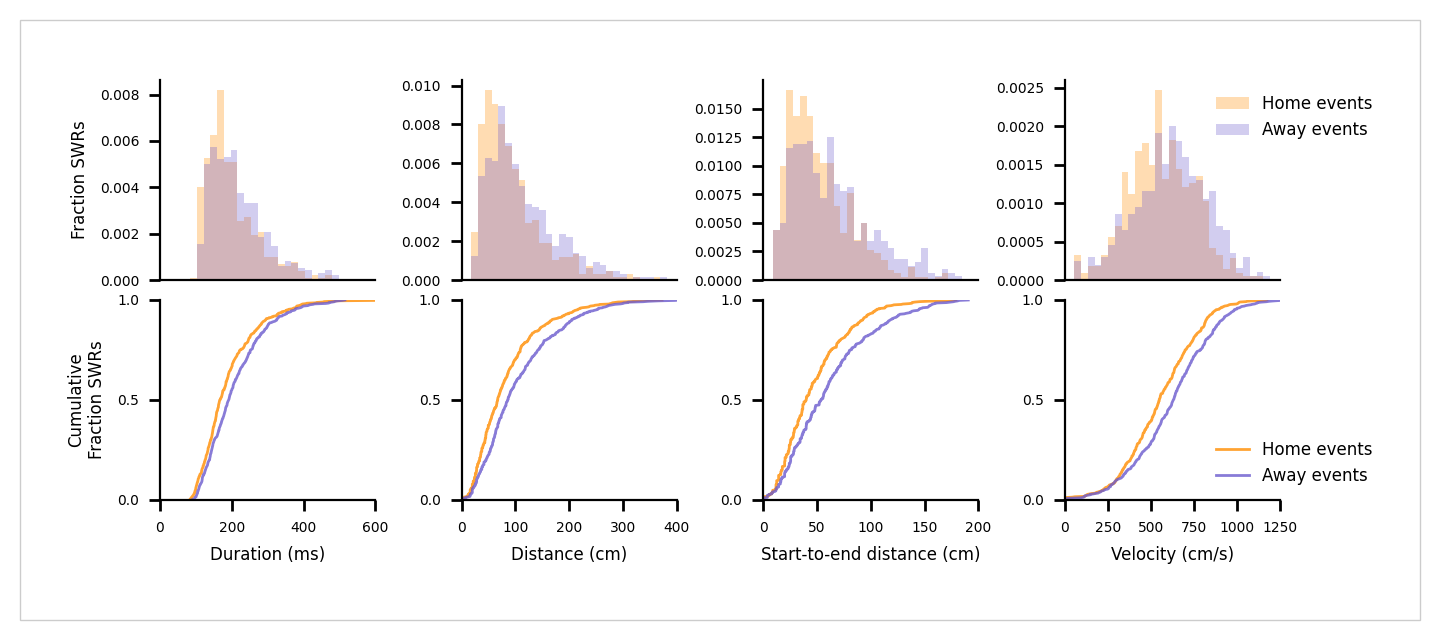

In [5]:
figure_width = 7
figure_height = 3
fig, ax = plt.subplots(2,4,figsize=(figure_width,figure_height), dpi=200)
plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.1)
colors = ['darkorange', 'slateblue']

stats_plot = ['duration_ms', 'distance_cm', 'direct_distance_cm', 'velocity_cm_s']
stats_plot_names = ['Duration (ms)', 'Distance (cm)', 'Start-to-end distance (cm)', 'Velocity (cm/s)']
max_stat = [600, 400, 200, 1250]

for i, stat in enumerate(stats_plot):
    bins = np.linspace(0, max_stat[i],30)
    
    for j, location_type in enumerate(['Home events', 'Away events']):
        if location_type == 'Home events':
            ax[0,i].hist(temporal_df[stat][temporal_df['current_location_type'] == 'home'], bins=bins, density=True, color=colors[j], alpha=.3, label=location_type)
            total = (temporal_df['current_location_type'] == 'home').sum()

            ax[1,i].plot(np.sort(temporal_df[stat][temporal_df['current_location_type'] == 'home']), np.arange(total)/(total-1), color=colors[j], alpha=.8, label=location_type,
                        linewidth=1)
        elif location_type == 'Away events':
            ax[0,i].hist(temporal_df[stat][temporal_df['current_location_type'] == 'goal'], bins=bins, density=True, color=colors[j], alpha=.3, label=location_type)
            total = (temporal_df['current_location_type'] == 'goal').sum()

            ax[1,i].plot(np.sort(temporal_df[stat][temporal_df['current_location_type'] == 'goal']), np.arange(total)/(total-1), color=colors[j], alpha=.8, label=location_type,
                        linewidth=1)
    stats_results = sp.ttest_ind(temporal_df[stat][temporal_df['current_location_type'] == 'home'],
                     temporal_df[stat][temporal_df['current_location_type'] == 'goal'])
    print(f't({stats_results[0].round(4)}), corrected p-value {stats_results[1]*3}')
    ax[1,i].set_xlabel(stats_plot_names[i])#, fontsize=18)
    ax[0,i].tick_params(direction='out', length=4, width=1)
    ax[1,i].tick_params(direction='out', length=4, width=1)
    ax[0,i].spines['top'].set_visible(False)
    ax[0,i].spines['right'].set_linewidth(False)
    ax[1,i].spines['top'].set_visible(False)
    ax[1,i].spines['right'].set_linewidth(False)
    ax[1,i].set_xlim([0,max_stat[i]])
    ax[1,i].set_ylim([0,1])
    ax[1,i].set_yticks(np.linspace(0,1,3))
    ax[0,i].set_xticks([])
    if i ==(len(stats_plot)-1):
        ax[1,i].legend(frameon=False, loc=4, bbox_to_anchor=(1.5,0,0,0))
        ax[0,i].legend(frameon=False, loc=1, bbox_to_anchor=(1.5,1,0,0))
    if i == 0:
        ax[1,i].set_ylabel('Cumulative\nFraction SWRs')
        ax[0,i].set_ylabel('Fraction SWRs')

    
plt.savefig(os.path.join(meta.FIGURES_PATH, "FigureS5a.svg"), dpi=500, transparent=True)

# visualize figure edge
rect = plt.Rectangle(
    # (lower-left corner), width, height
    (0, 0), 1, 1, fill=False, color="k", lw=.5, alpha=.2,
    zorder=1000, transform=fig.transFigure, figure=fig
)
fig.patches.extend([rect])

print('AWAY = GOAL')
print(f"degrees of freedom={(temporal_df['current_location_type'] == 'home').sum() + (temporal_df['current_location_type'] == 'goal').sum()}")

plt.show()

## Supplementary Figure - AWAY = GOAL, matched duration distribution

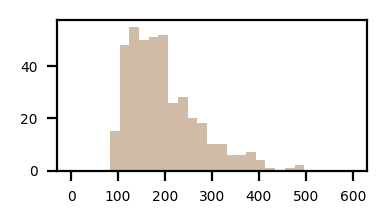

410 410


In [6]:
plt.figure(figsize=(2,1), dpi=200)
bins = np.linspace(0, 600, 30)

np.random.seed(10)
subsample_inds_home = np.array([])
subsample_inds_away = np.array([])
for i in range(len(bins)-1):
    bin_inds_home = (temporal_df['duration_ms'][(temporal_df['current_location_type'] == 'home') & 
                                          (temporal_df['duration_ms'] > bins[i]) &
                                          (temporal_df['duration_ms'] <= bins[i+1])])
    bin_inds_away = temporal_df['duration_ms'][(temporal_df['current_location_type'] == 'goal') & 
                                          (temporal_df['duration_ms'] > bins[i]) &
                                          (temporal_df['duration_ms'] <= bins[i+1])]
    if (len(bin_inds_home) > 0) or (len(bin_inds_away) > 0):
        if len(bin_inds_home) > len(bin_inds_away):
            bin_inds_home_subsample = np.random.choice(bin_inds_home.index, size=len(bin_inds_away), replace=False)
            subsample_inds_home = np.append(subsample_inds_home, bin_inds_home_subsample)
            subsample_inds_away = np.append(subsample_inds_away, bin_inds_away.index)
        elif len(bin_inds_away) > len(bin_inds_home):
            bin_inds_away_subsample = np.random.choice(bin_inds_away.index, size=len(bin_inds_home), replace=False)
            subsample_inds_away = np.append(subsample_inds_away, bin_inds_away_subsample)
            subsample_inds_home = np.append(subsample_inds_home, bin_inds_home.index)
        else:
            subsample_inds_away = np.append(subsample_inds_away, bin_inds_away.index)
            subsample_inds_home = np.append(subsample_inds_home, bin_inds_home.index)

plt.hist(temporal_df.loc[subsample_inds_away.astype(int)]['duration_ms'], bins=bins, density=False, alpha=.3, label='away')
plt.hist(temporal_df.loc[subsample_inds_home.astype(int)]['duration_ms'], bins=bins, density=False, alpha=.3, label='home')
plt.show()

print(len(subsample_inds_away), len(subsample_inds_home))

t(0.0119), corrected p-value 2.971546373446492
t(-1.6926), corrected p-value 0.27273671650136944
t(-3.0807), corrected p-value 0.00640327985006295
t(-3.3409), corrected p-value 0.0026187286867332803
AWAY = GOAL
degrees of freedom=820


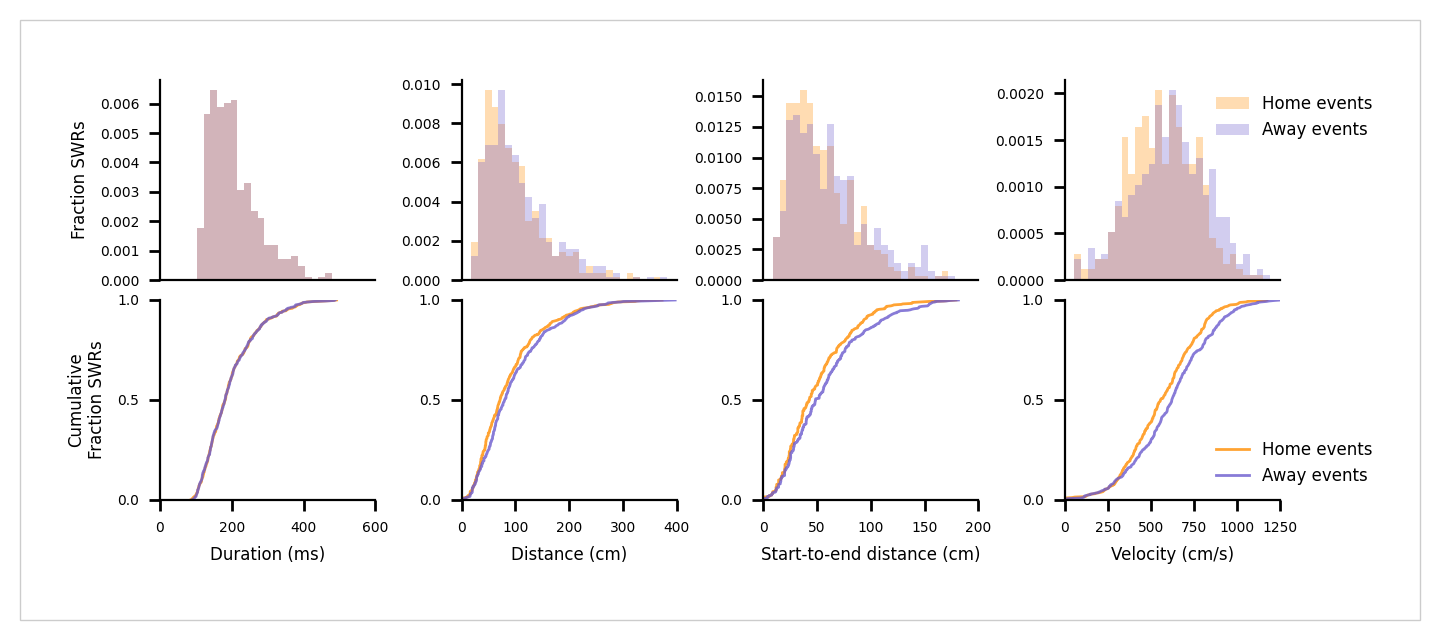

In [7]:
figure_width = 7
figure_height = 3
fig, ax = plt.subplots(2,4,figsize=(figure_width,figure_height), dpi=200)
plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.1)
colors = ['darkorange', 'slateblue']

stats_plot = ['duration_ms', 'distance_cm', 'direct_distance_cm', 'velocity_cm_s']
stats_plot_names = ['Duration (ms)', 'Distance (cm)', 'Start-to-end distance (cm)', 'Velocity (cm/s)']
max_stat = [600, 400, 200, 1250]

for i, stat in enumerate(stats_plot):
    bins = np.linspace(0, max_stat[i],30)
    
    for j, location_type in enumerate(['Home events', 'Away events']):
        if location_type == 'Home events':
            ax[0,i].hist(temporal_df.loc[subsample_inds_home.astype(int)][stat][temporal_df['current_location_type'] == 'home'], bins=bins, density=True, color=colors[j], alpha=.3, label=location_type)
            total = (temporal_df.loc[subsample_inds_home.astype(int)]['current_location_type'] == 'home').sum()

            ax[1,i].plot(np.sort(temporal_df.loc[subsample_inds_home.astype(int)][stat][temporal_df['current_location_type'] == 'home']), np.arange(total)/(total-1), color=colors[j], alpha=.8, label=location_type,
                        linewidth=1)
        elif location_type == 'Away events': 
            ax[0,i].hist(temporal_df.loc[subsample_inds_away.astype(int)][stat][temporal_df['current_location_type'] =='goal'], bins=bins, density=True, color=colors[j], alpha=.3, label=location_type)
            total = (temporal_df.loc[subsample_inds_away.astype(int)]['current_location_type'] =='goal').sum()

            ax[1,i].plot(np.sort(temporal_df.loc[subsample_inds_away.astype(int)][stat][temporal_df['current_location_type'] =='goal']), np.arange(total)/(total-1), color=colors[j], alpha=.8, label=location_type,
                        linewidth=1)
    stats_results = sp.ttest_ind(temporal_df.loc[subsample_inds_home.astype(int)][stat][temporal_df['current_location_type'] == 'home'],
                     temporal_df.loc[subsample_inds_away.astype(int)][stat][temporal_df['current_location_type'] =='goal'])
    print(f't({stats_results[0].round(4)}), corrected p-value {stats_results[1]*3}')
    ax[1,i].set_xlabel(stats_plot_names[i])
    ax[0,i].tick_params(direction='out', length=4, width=1)
    ax[1,i].tick_params(direction='out', length=4, width=1)
    ax[0,i].spines['top'].set_visible(False)
    ax[0,i].spines['right'].set_linewidth(False)
    ax[1,i].spines['top'].set_visible(False)
    ax[1,i].spines['right'].set_linewidth(False)
    ax[1,i].set_xlim([0,max_stat[i]])
    ax[1,i].set_ylim([0,1])
    ax[1,i].set_yticks(np.linspace(0,1,3))
    ax[0,i].set_xticks([])
    if i ==(len(stats_plot)-1):
        ax[1,i].legend(frameon=False, loc=4, bbox_to_anchor=(1.5,0,0,0))
        ax[0,i].legend(frameon=False, loc=1, bbox_to_anchor=(1.5,1,0,0))
    if i == 0:
        ax[1,i].set_ylabel('Cumulative\nFraction SWRs')
        ax[0,i].set_ylabel('Fraction SWRs')

    
plt.savefig(os.path.join(meta.FIGURES_PATH, "FigureS5b.svg"), dpi=500, transparent=True)

# visualize figure edge
rect = plt.Rectangle(
    # (lower-left corner), width, height
    (0, 0), 1, 1, fill=False, color="k", lw=.5, alpha=.2,
    zorder=1000, transform=fig.transFigure, figure=fig
)
fig.patches.extend([rect])

print('AWAY = GOAL')
print(f"degrees of freedom={len(subsample_inds_away) + len(subsample_inds_home)}")

plt.show()

## Supplementary Figure - PF classified

t(-2.465), corrected p-value 0.04188618307657687
t(-1.6198), corrected p-value 0.31727555261238133
t(-1.8889), corrected p-value 0.17807684726298167
t(0.1117), corrected p-value 2.7332759285648853
degrees of freedom=642


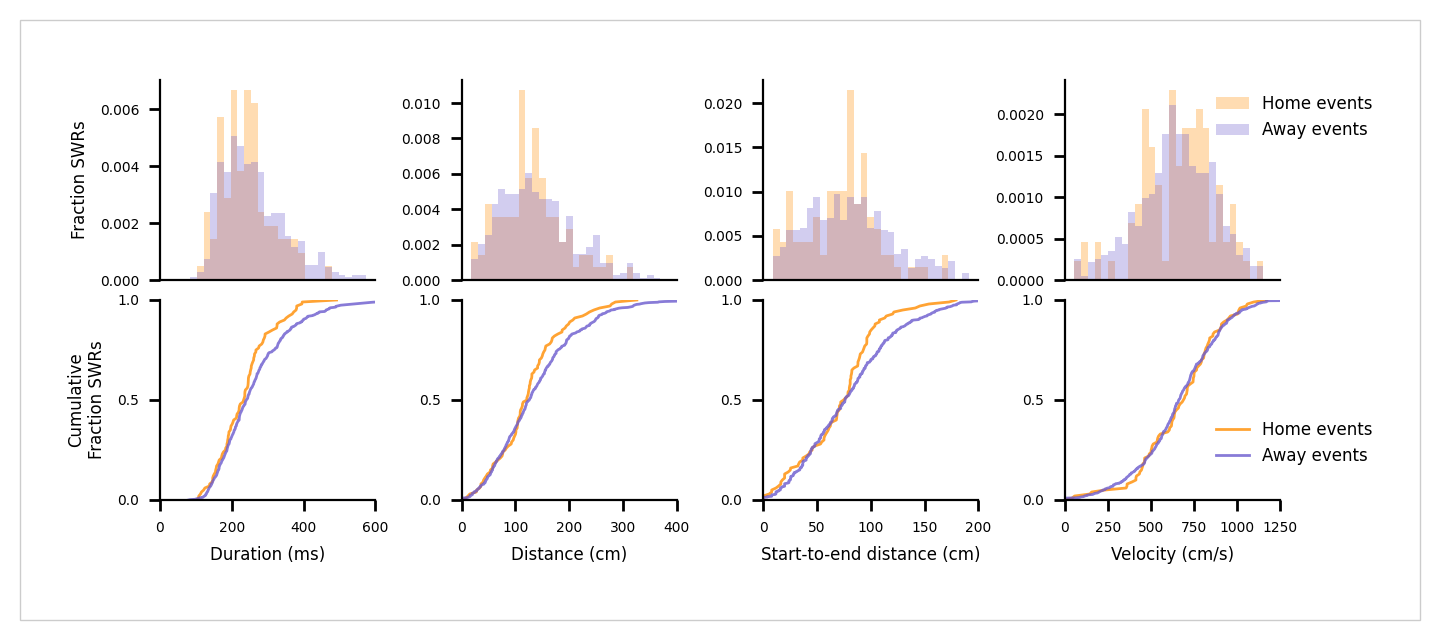

In [13]:
map_df = temporal_df[temporal_df['map_classified_PF']==1]
df_use = map_df

figure_width = 7
figure_height = 3
fig, ax = plt.subplots(2,4,figsize=(figure_width,figure_height), dpi=200)
plt.subplots_adjust(left=0.1,
                    bottom=0.2,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.1)
colors = ['darkorange', 'slateblue']

stats_plot = ['duration_ms', 'distance_cm', 'direct_distance_cm', 'velocity_cm_s']
stats_plot_names = ['Duration (ms)', 'Distance (cm)', 'Start-to-end distance (cm)', 'Velocity (cm/s)']
max_stat = [600, 400, 200, 1250]

for i, stat in enumerate(stats_plot):
    bins = np.linspace(0, max_stat[i],30)
    
    for j, location_type in enumerate(['Home events', 'Away events']):
        if location_type == 'Home events':
            ax[0,i].hist(df_use[stat][df_use['current_location_type'] == 'home'], bins=bins, density=True, color=colors[j], alpha=.3, label=location_type)
            total = (df_use['current_location_type'] == 'home').sum()

            ax[1,i].plot(np.sort(df_use[stat][df_use['current_location_type'] == 'home']), np.arange(total)/(total-1), color=colors[j], alpha=.8, label=location_type,
                        linewidth=1)
        elif location_type == 'Away events':
            ax[0,i].hist(df_use[stat][df_use['current_location_type'] != 'home'], bins=bins, density=True, color=colors[j], alpha=.3, label=location_type)
            total = (df_use['current_location_type'] != 'home').sum()

            ax[1,i].plot(np.sort(df_use[stat][df_use['current_location_type'] != 'home']), np.arange(total)/(total-1), color=colors[j], alpha=.8, label=location_type,
                        linewidth=1)
    stats_results = sp.ttest_ind(df_use[stat][df_use['current_location_type'] == 'home'],
                     df_use[stat][df_use['current_location_type'] != 'home'])
    print(f't({stats_results[0].round(4)}), corrected p-value {stats_results[1]*3}')
    ax[1,i].set_xlabel(stats_plot_names[i])
    ax[0,i].tick_params(direction='out', length=4, width=1)#
    ax[1,i].tick_params(direction='out', length=4, width=1)#
    ax[0,i].spines['top'].set_visible(False)
    ax[0,i].spines['right'].set_linewidth(False)
    ax[1,i].spines['top'].set_visible(False)
    ax[1,i].spines['right'].set_linewidth(False)
    ax[1,i].set_xlim([0,max_stat[i]])
    ax[1,i].set_ylim([0,1])
    ax[1,i].set_yticks(np.linspace(0,1,3))
    ax[0,i].set_xticks([])
    if i ==3:
        ax[1,i].legend(frameon=False, loc=4, bbox_to_anchor=(1.5,0.1,0,0))
        ax[0,i].legend(frameon=False, loc=1, bbox_to_anchor=(1.5,1,0,0))
    if i == 0:
        ax[1,i].set_ylabel('Cumulative\nFraction SWRs')
        ax[0,i].set_ylabel('Fraction SWRs')

    
plt.savefig(os.path.join(meta.FIGURES_PATH, "FigureS5c.svg"), dpi=500, transparent=True)

# visualize figure edge
rect = plt.Rectangle(
    # (lower-left corner), width, height
    (0, 0), 1, 1, fill=False, color="k", lw=.5, alpha=.2,
    zorder=1000, transform=fig.transFigure, figure=fig
)
fig.patches.extend([rect])
print(f"degrees of freedom={(map_df['current_location_type'] == 'home').sum() + (map_df['current_location_type'] != 'home').sum()}")

plt.show()